<h1 style="font-size: 50px ; text-align : center ;">Data Analysis Project Using Python</h1>

<h1 style="font-size: 30px;">Importing Modules and Libraries and Dataset</h1>

In [447]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as s 

In [448]:
df = pd.read_csv(r'Diwali Sales Data.csv' , encoding = 'unicode_escape')

<h1 style="font-size: 30px;">Checking and Cleaning Dataset</h1>

In [449]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [450]:
df.shape 

(11251, 15)

In [451]:
df.info()
# 13 and 14 columns has all values null. So we can drop them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Deleting column with all null values**

In [452]:
df.drop(['Status' , 'unnamed1'], axis =1 , inplace= True)

**Checking for Null values from the dataframe.**

In [453]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**Replacing NaN Values with 0**

In [454]:
df.fillna(0, inplace = True)

**To Change Datatype we use astype() Function**

In [455]:
# Changing to integer datatype.
df['Amount'] = df['Amount'].astype('int')

In [456]:
# Checking the datatype of integer
df['Amount'].dtypes

dtype('int32')

In [457]:
df.columns 

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [458]:
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527598
std,12.754122,1.115047,5228.683337
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


<h1 style="font-size: 40px; text-align : center ;">Exploratory Data Analysis</h1>

<h1 style="font-size: 20px;">Gender</h1>

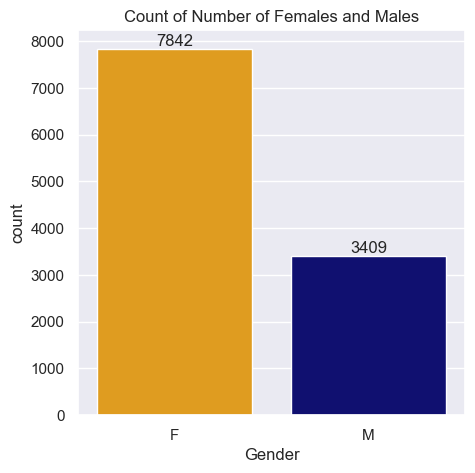

In [477]:
ax = s.countplot(x = 'Gender' , data = df , palette={'M': 'navy', 'F': 'orange'} , hue = 'Gender')
for bars in ax.containers : # Labelling the bar.
    ax.bar_label(bars)
s.set(rc={"figure.figsize": (5, 5)}) 
plt.title('Count of Number of Females and Males')
plt.show()

*From above analysis we can to know that Number of Females is more for Shopping than Males.*

In [460]:
sales_gen = df.groupby( by= 'Gender' , as_index = False)['Amount'].sum().sort_values(by= 'Amount' , ascending = False) 

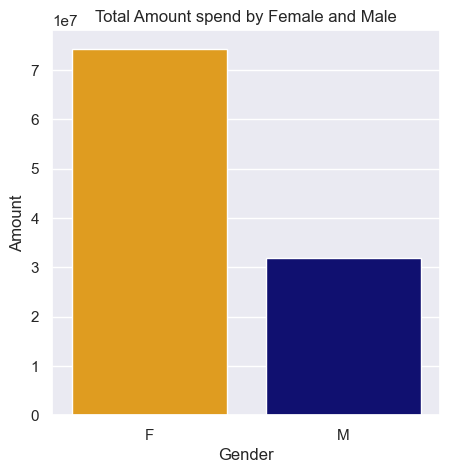

In [478]:
s.set(rc={"figure.figsize": (5, 5)}) 
s.barplot( x='Gender' , y='Amount' , data = sales_gen , palette={'M': 'navy', 'F': 'orange'} , hue ='Gender' ,  legend=False)
plt.title('Total Amount spend by Female and Male')
plt.show()


*From the above analysis , we can see that mostly the buyers are females. The sum of amount spend by females is more than males*

<h1 style="font-size: 20px;">Age</h1>

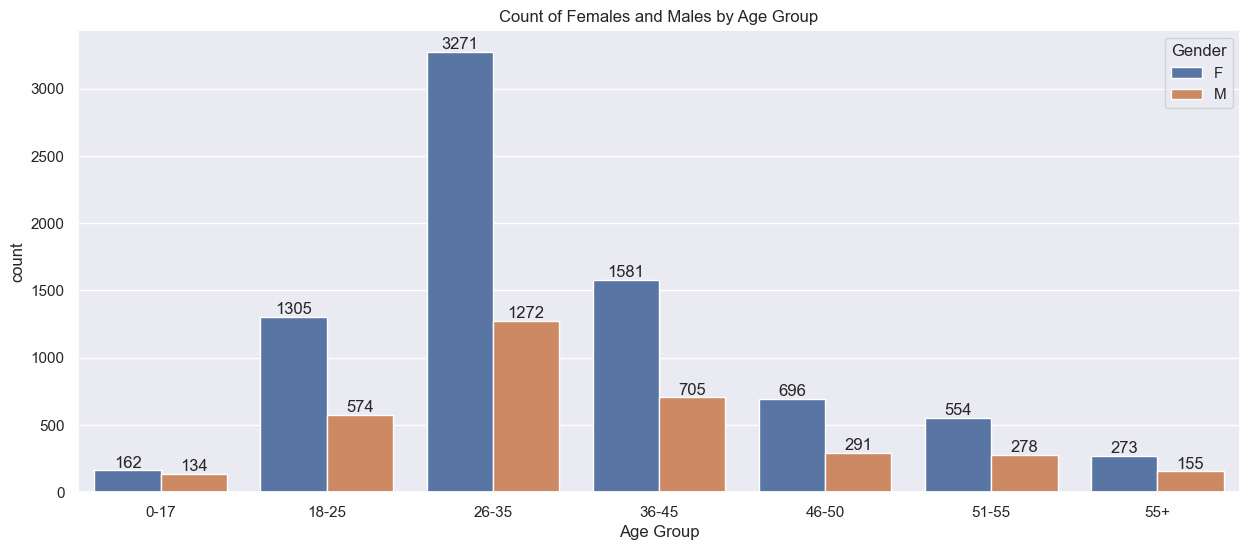

In [462]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] # Defining the order of the Age Group column.
ax = s.countplot( x= 'Age Group' , hue= 'Gender' , data = df , order = age_order)
for i in ax.containers : # Labelling the bar.
    ax.bar_label(i)

plt.title('Count of Females and Males by Age Group')
plt.show()

*We can see that , Females from Age Group 26-35 are more likely to do shopping than Males*

In [463]:
sales_age = df.groupby( ['Age Group'] , as_index = False)['Amount'].sum().sort_values( by ='Amount' , ascending= False)

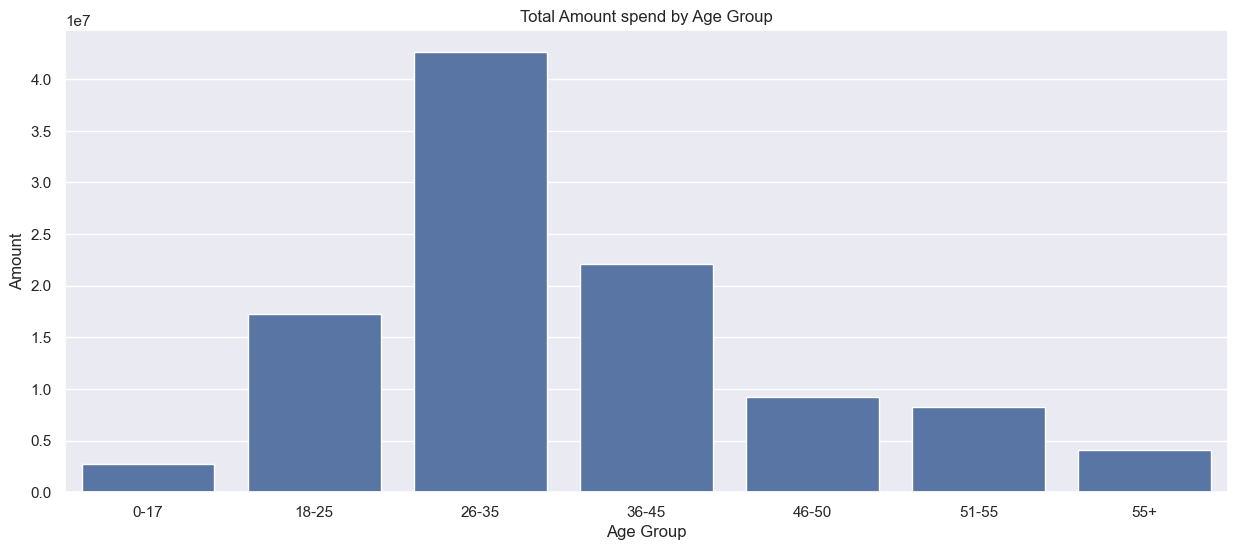

In [464]:
s.barplot(x = 'Age Group' , y='Amount' , data= sales_age , order = age_order)
plt.title('Total Amount spend by Age Group')
plt.show()

*From above we got to know that age group between 26-35 are likely interested in shopping and has spend more money on shopping*

<h1 style="font-size: 20px;">State</h1>

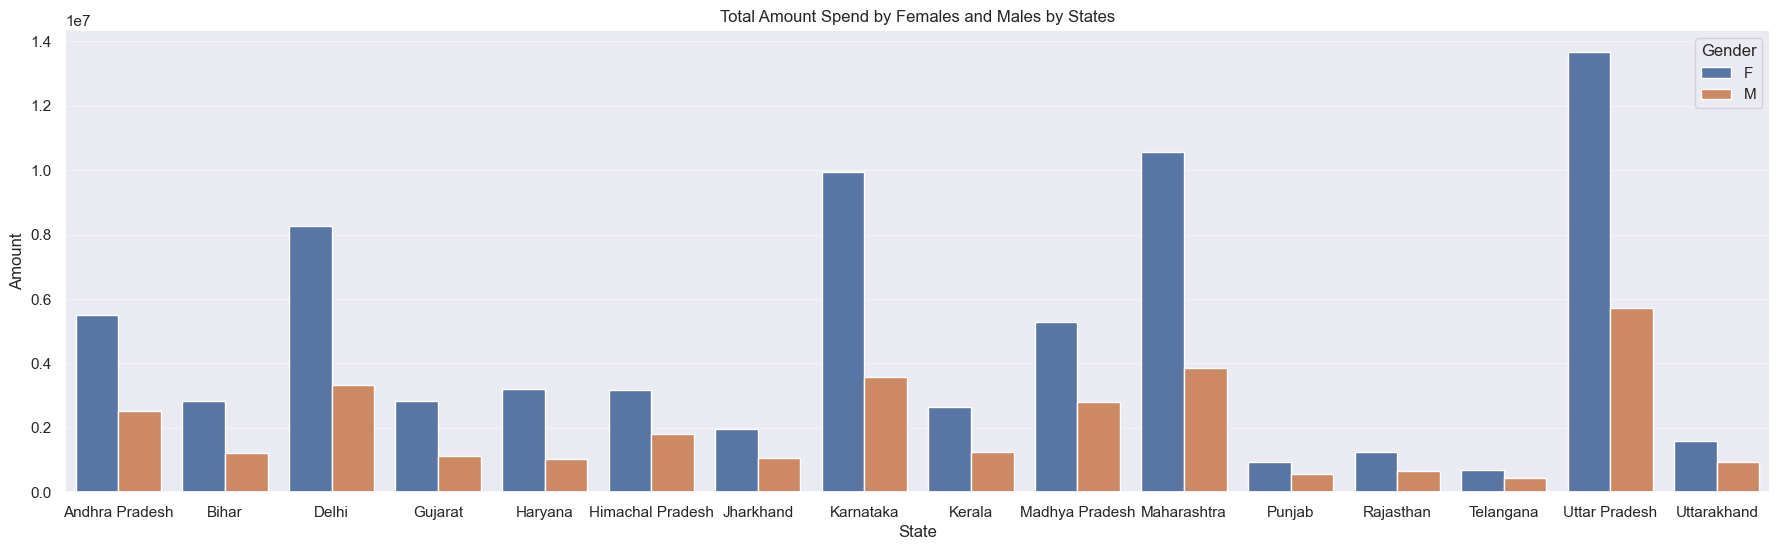

In [465]:

state_spend = df.groupby( ['State' ,'Gender'] , as_index = False)['Amount'].sum()
# plt.figure(figsize=(20, 5)) 

s.set(rc={"figure.figsize": (22, 6)}) 
ax = s.barplot( x ='State' , y='Amount' , data=state_spend , hue= 'Gender' , width= 0.8)

plt.title('Total Amount Spend by Females and Males by States')
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.show()

*From above analysis , we came to know that Females and Males from Uttar Pradesh are more interested in shopping*

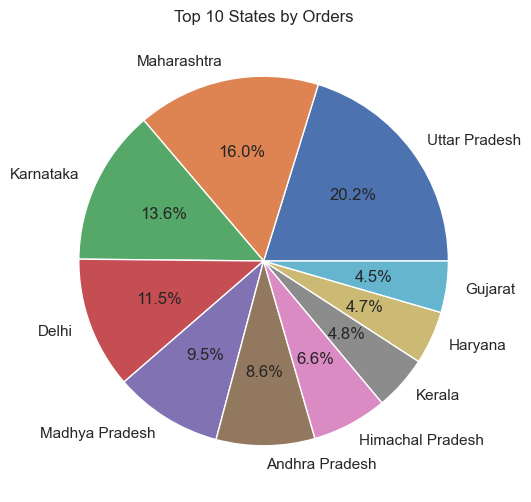

In [466]:
state_orders = df.groupby('State' , as_index =False)['Orders'].sum().sort_values(by ='Orders' , ascending = False).head(10)


plt.pie(state_orders['Orders'] , labels= state_orders['State'] ,autopct='%1.1f%%')
plt.title('Top 10 States by Orders' )
plt.show()

*From above pie chart we can conclude that maximum number of orders are from Uttar Pradesh*

<h1 style="font-size: 20px;">Occupation</h1>

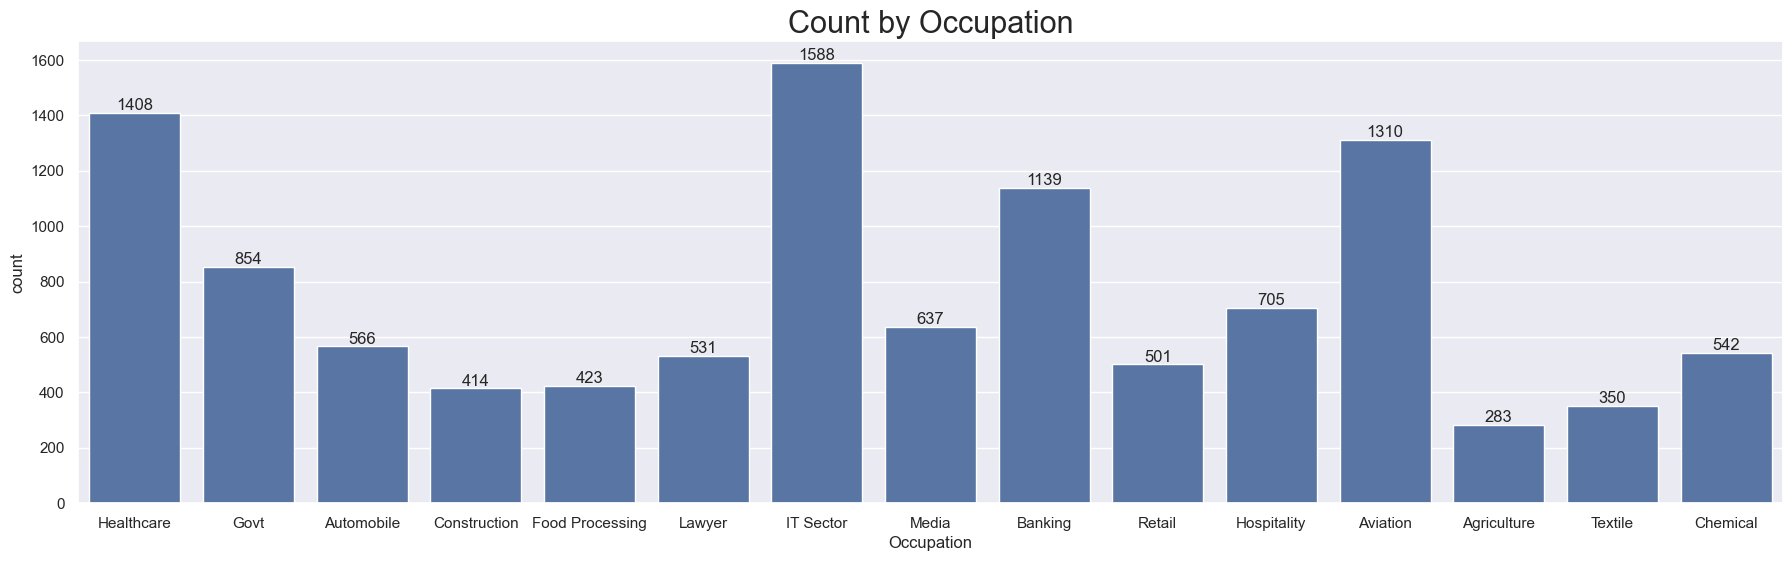

In [467]:
x = s.countplot( x='Occupation' , data =df)
s.set(rc={"figure.figsize" : (23,6)})
for i in x.containers :
    x.bar_label(i)
x.set_title("Count by Occupation", fontsize=22)
plt.show()

*Here we can see that IT Sector , Healthcare and Aviation contribute more in shopping*

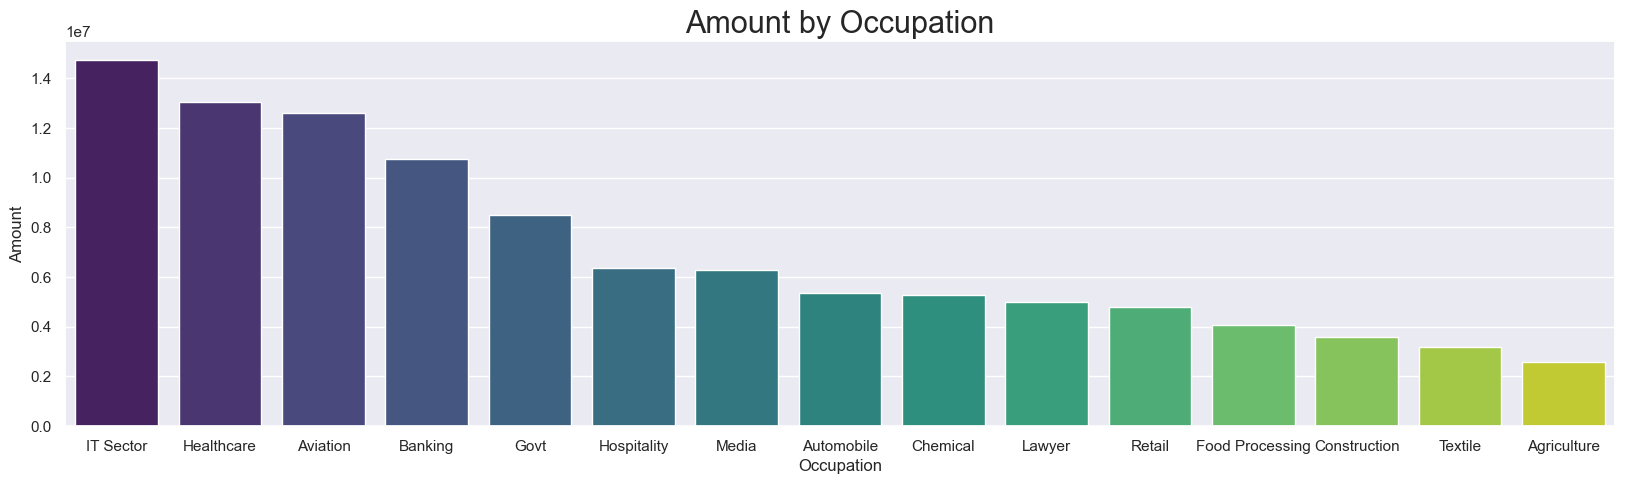

In [468]:

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

s.set(rc={'figure.figsize':(20,5)})

x = s.barplot(data = sales_state, x = 'Occupation',y= 'Amount' , palette="viridis" , hue= 'Occupation' , legend=False)
x.set_title("Amount by Occupation", fontsize=22)
plt.show()

*The IT Sector, Healthcare, and Aviation contribute the highest amounts, while Agriculture and Textile have the lowest contributions.*

<h1 style="font-size: 20px;">Product</h1>

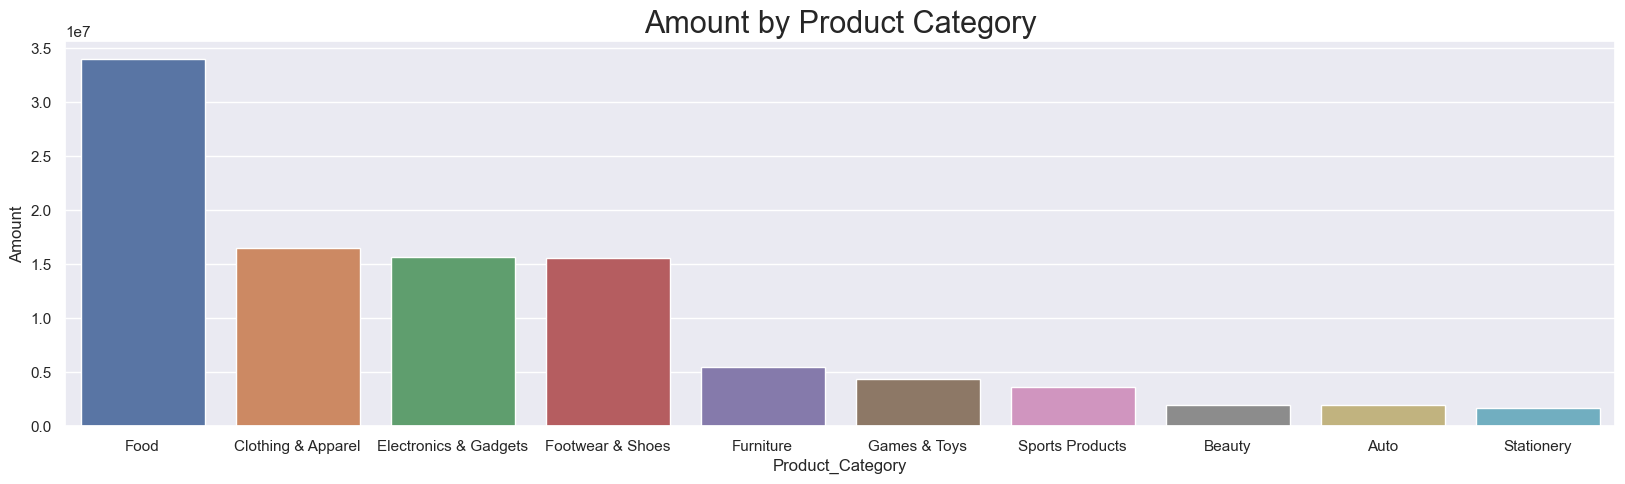

In [469]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

s.set(rc={'figure.figsize':(20,5)})
x = s.barplot(data = sales_state, x = 'Product_Category',y= 'Amount' , palette = 'deep' , hue = 'Product_Category')
x.set_title("Amount by Product Category", fontsize=22)
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*